In [30]:
import pandas as pd
import os

# 엑셀 파일 경로
file_path = '../raw/1_호선별 개정도 현황_호선별 개정도 LIST(3개 호선)_설명포함.xlsx'

# 첫 번째 시트 읽기 (주제 및 데이터 설명)
data_overview = pd.read_excel(file_path, sheet_name=0)

# 데이터 프레임 출력
data_overview.head()

,1,주제,호선별 개정도 현황,Unnamed: 3
0,NaN,NaN,NaN,NaN
1,2.0,RAW DATA 내용,설계도면이 수정된 경우 수정된 내용을 개정도로 작성하고 이를 출도해서 후속부서들이 ...,NaN
2,NaN,NaN,호선별로 출도된 개정도면에 대한 정보를 확인할 수 있는 DATA,NaN
3,NaN,NaN,NaN,NaN
4,3.0,Column 설명,"(데이터 분석 관점에서 주요 column은 노란색 셀로 표시, 개인 관점에 따라 달...",NaN


In [31]:
# 엑셀 파일 객체 생성
excel_file = pd.ExcelFile(file_path)

# 모든 시트 이름 가져오기
sheet_names = excel_file.sheet_names

all_data = pd.DataFrame()
for sheet in sheet_names[1:]:  # 첫 번째 시트 제외
    sheet_data = pd.read_excel(file_path, sheet_name=sheet)
    all_data = pd.concat([all_data, sheet_data], ignore_index=True)

# 데이터 프레임 출력
print(all_data.head())

   No 프로젝트번호 출도부서     과제번호       도면명       출도일자             출도번호 근원부서 원인코드  \
0   1     P1  D12  DPT4001  DNAME263 2023-11-06  DPT400120231106  NaN  R14   
1   2     P1  D12  DPT4002  DNAME268 2023-11-13  DPT400220231113  NaN   R1   
2   3     P1  D12  DPT4003  DNAME268 2023-11-13  DPT400320231113  NaN   R1   
3   4     P1  D12  DPT4004  DNAME268 2023-11-13  DPT400420231113  NaN   R1   
4   5     P1  D12  DPT3982  DNAME267 2023-11-13  DPT398220231113  NaN   R1   

       코드명  
0  RNAME10  
1  RNAME20  
2  RNAME20  
3  RNAME20  
4  RNAME20  


In [32]:
# 결측치 확인
missing_values = all_data.isnull().sum()
# 데이터 확인
missing_values, all_data.head()

(No           0
 프로젝트번호       0
 출도부서         0
 과제번호         1
 도면명          2
 출도일자         0
 출도번호         1
 근원부서      7400
 원인코드         0
 코드명          0
 dtype: int64,
    No 프로젝트번호 출도부서     과제번호       도면명       출도일자             출도번호 근원부서 원인코드  \
 0   1     P1  D12  DPT4001  DNAME263 2023-11-06  DPT400120231106  NaN  R14   
 1   2     P1  D12  DPT4002  DNAME268 2023-11-13  DPT400220231113  NaN   R1   
 2   3     P1  D12  DPT4003  DNAME268 2023-11-13  DPT400320231113  NaN   R1   
 3   4     P1  D12  DPT4004  DNAME268 2023-11-13  DPT400420231113  NaN   R1   
 4   5     P1  D12  DPT3982  DNAME267 2023-11-13  DPT398220231113  NaN   R1   
 
        코드명  
 0  RNAME10  
 1  RNAME20  
 2  RNAME20  
 3  RNAME20  
 4  RNAME20  )

In [33]:
data_cleaned = all_data.copy()

data_cleaned[['출도번호', '과제번호', '도면명']] = data_cleaned[['출도번호', '과제번호', '도면명']].fillna(method='ffill')

# 근원부서 결측치 처리: '미확인'으로 채우기
data_cleaned['근원부서'] = data_cleaned['근원부서'].fillna('미확인')

# 처리 후 결측치 확인
missing_values_after_cleaning = data_cleaned.isnull().sum()
# 데이터 확인
missing_values_after_cleaning, data_cleaned.head()

C:\Users\samsung\AppData\Local\Temp\ipykernel_5976\1129713843.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_cleaned[['출도번호', '과제번호', '도면명']] = data_cleaned[['출도번호', '과제번호', '도면명']].fillna(method='ffill')


(No        0
 프로젝트번호    0
 출도부서      0
 과제번호      0
 도면명       0
 출도일자      0
 출도번호      0
 근원부서      0
 원인코드      0
 코드명       0
 dtype: int64,
    No 프로젝트번호 출도부서     과제번호       도면명       출도일자             출도번호 근원부서 원인코드  \
 0   1     P1  D12  DPT4001  DNAME263 2023-11-06  DPT400120231106  미확인  R14   
 1   2     P1  D12  DPT4002  DNAME268 2023-11-13  DPT400220231113  미확인   R1   
 2   3     P1  D12  DPT4003  DNAME268 2023-11-13  DPT400320231113  미확인   R1   
 3   4     P1  D12  DPT4004  DNAME268 2023-11-13  DPT400420231113  미확인   R1   
 4   5     P1  D12  DPT3982  DNAME267 2023-11-13  DPT398220231113  미확인   R1   
 
        코드명  
 0  RNAME10  
 1  RNAME20  
 2  RNAME20  
 3  RNAME20  
 4  RNAME20  )

In [34]:
# 날짜 형식 변환
data_cleaned['출도일자'] = pd.to_datetime(data_cleaned['출도일자'], format='%Y-%m-%d')

In [35]:
import os

# 폴더 생성
if not os.path.exists('processed_data'):
    os.makedirs('processed_data')

# 전처리된 데이터 저장
data_cleaned.to_csv('processed_data/processed_data_1.csv', index=False)

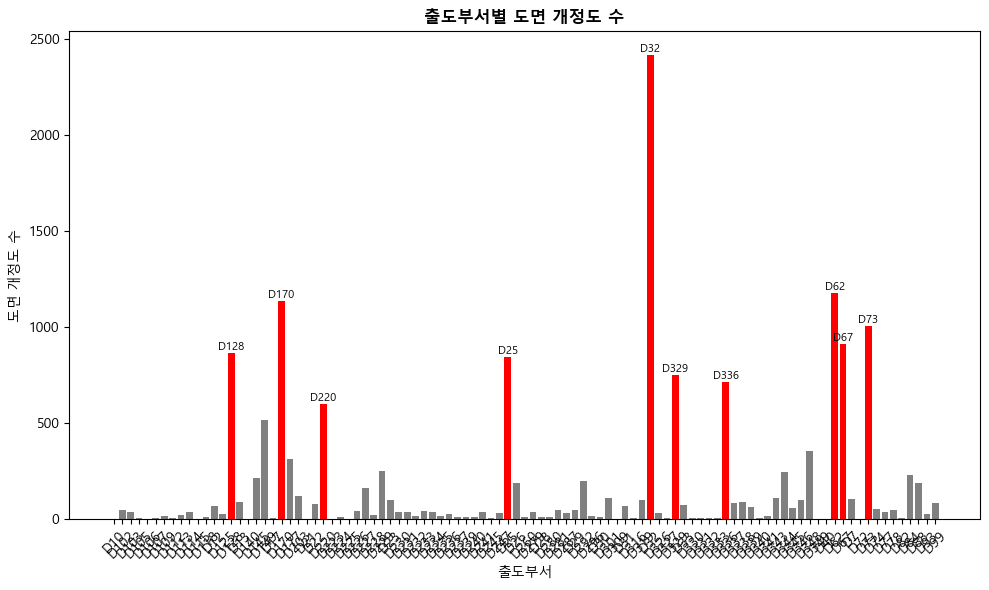

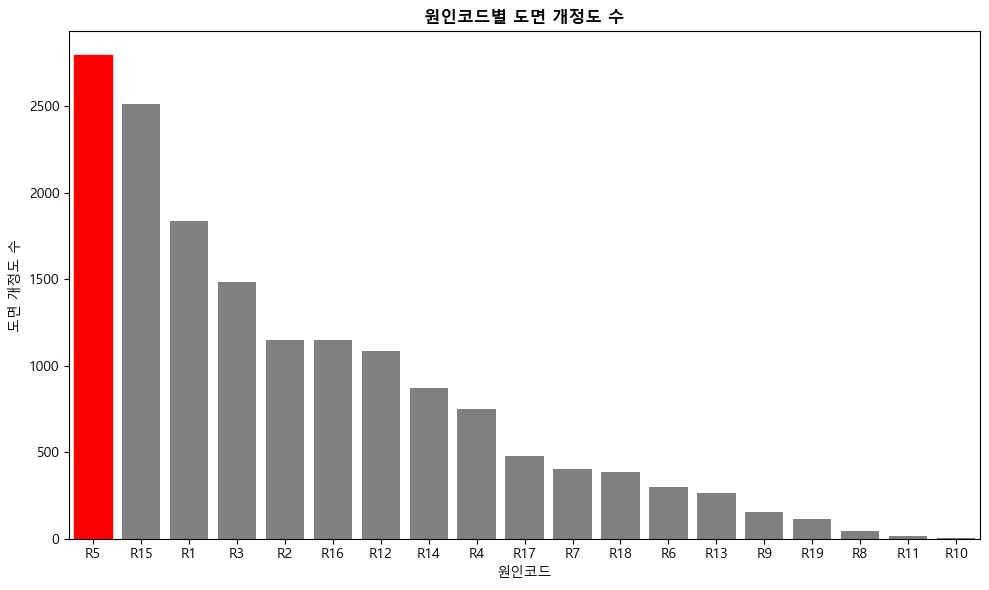

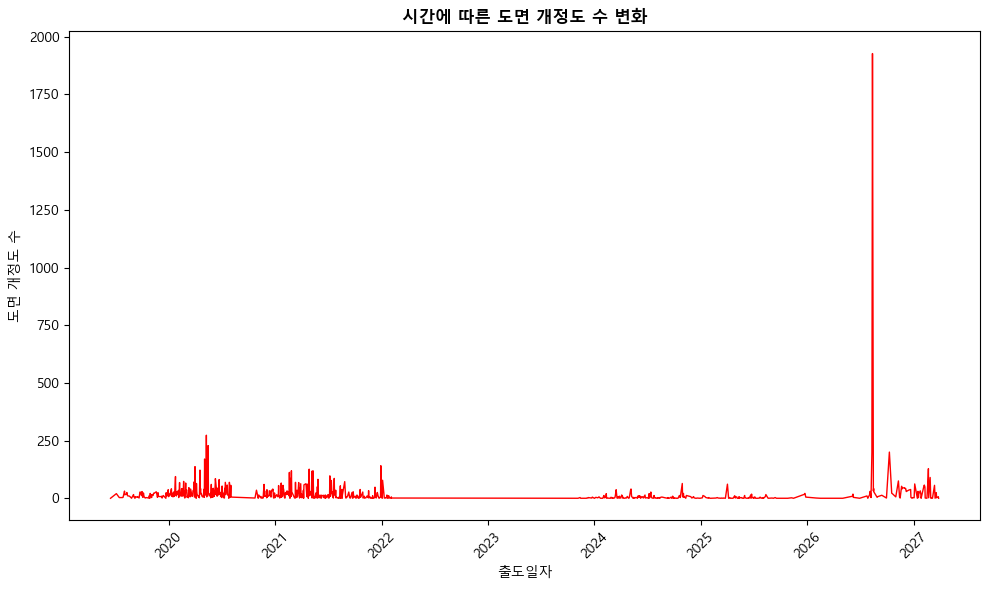

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 출도부서별 도면 개정도 수 계산
count_by_ship = data_cleaned.groupby('출도부서').size().reset_index(name='도면 개정도 수')
# 상위 10% 기준 계산
top_10_percent_threshold = count_by_ship['도면 개정도 수'].quantile(0.9)
# 색상 설정: 상위 10%는 빨간색, 나머지는 회색
count_by_ship['color'] = count_by_ship['도면 개정도 수'].apply(
    lambda x: 'red' if x >= top_10_percent_threshold else 'grey'
)
# 시각화
plt.figure(figsize=(10, 6))
bars = plt.bar(count_by_ship['출도부서'], count_by_ship['도면 개정도 수'], color=count_by_ship['color'])
# 상위 10% 이내 막대 위에 값 레이블 추가
for bar, (label, color) in zip(bars, zip(count_by_ship['출도부서'], count_by_ship['color'])):
    if bar.get_facecolor() == (1.0, 0.0, 0.0, 1.0):  # 빨간색 막대만 선택
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                 f'{label}', ha='center', va='bottom', fontsize=8, color='black')
plt.title('출도부서별 도면 개정도 수', fontweight='bold')
plt.xlabel('출도부서')
plt.ylabel('도면 개정도 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 원인코드별 개수
cause_counts = data_cleaned['원인코드'].value_counts()
# 시각화: 원인코드별 도면 개정도 수
plt.figure(figsize=(10, 6))
# 기본적으로 회색으로 막대 그래프 생성
ax = sns.barplot(x=cause_counts.index, y=cause_counts.values, color='grey')
# 각 막대의 높이를 확인하여, 가장 큰 값의 막대만 빨간색으로 변경
max_height = 0
max_rect = None
for rect in ax.patches:
    if rect.get_height() > max_height:
        max_height = rect.get_height()
        max_rect = rect
if max_rect:
    max_rect.set_color('red')
plt.title('원인코드별 도면 개정도 수', fontweight='bold')
plt.xlabel('원인코드')
plt.ylabel('도면 개정도 수')
plt.tight_layout()
plt.show()

# 도면 출도는 실질적인 작업이 시작되기 전에 도면을 배포하거나 출력하는 작업입니다.
# 따라서 보통 도면 개정 후, 도면 출도 작업이 이뤄진다.
# 출도일자별 도면 개정도 수
daily_counts = data_cleaned['출도일자'].value_counts().sort_index()
# 시각화: 시간에 따른 도면 개정도 수 변화
plt.figure(figsize=(10, 6))
sns.lineplot(x=daily_counts.index, y=daily_counts.values, color='red', linewidth=1)
plt.title('시간에 따른 도면 개정도 수 변화', fontweight='bold')
plt.xlabel('출도일자')
plt.ylabel('도면 개정도 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [37]:
# 데이터의 기간 확인
print(f"데이터의 시작 날짜: {data_cleaned['출도일자'].min()}")
print(f"데이터의 종료 날짜: {data_cleaned['출도일자'].max()}")

# 출도일자별 데이터 개수 확인
date_counts = data_cleaned['출도일자'].value_counts().sort_index()
print(date_counts)

데이터의 시작 날짜: 2019-06-15 00:00:00
데이터의 종료 날짜: 2027-03-28 00:00:00
출도일자
2019-06-15     1
2019-07-05    21
2019-07-15     4
2019-07-26     4
2019-07-28     5
              ..
2027-03-16     1
2027-03-20    25
2027-03-21     3
2027-03-27     8
2027-03-28     1
Name: count, Length: 817, dtype: int64


c:\Users\samsung\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\samsung\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\samsung\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               도면 개정도 수   No. Observations:                  817
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4643.377
Date:                Mon, 02 Sep 2024   AIC                           9292.754
Time:                        16:39:02   BIC                           9306.867
Sample:                             0   HQIC                          9298.170
                                - 817                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0879      0.020      4.296      0.000       0.048       0.128
ma.L1         -0.9829      0.013    -74.184      0.000      -1.009      -0.957
sigma2      5110.3578     21.155    241.573      0.0

c:\Users\samsung\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\samsung\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


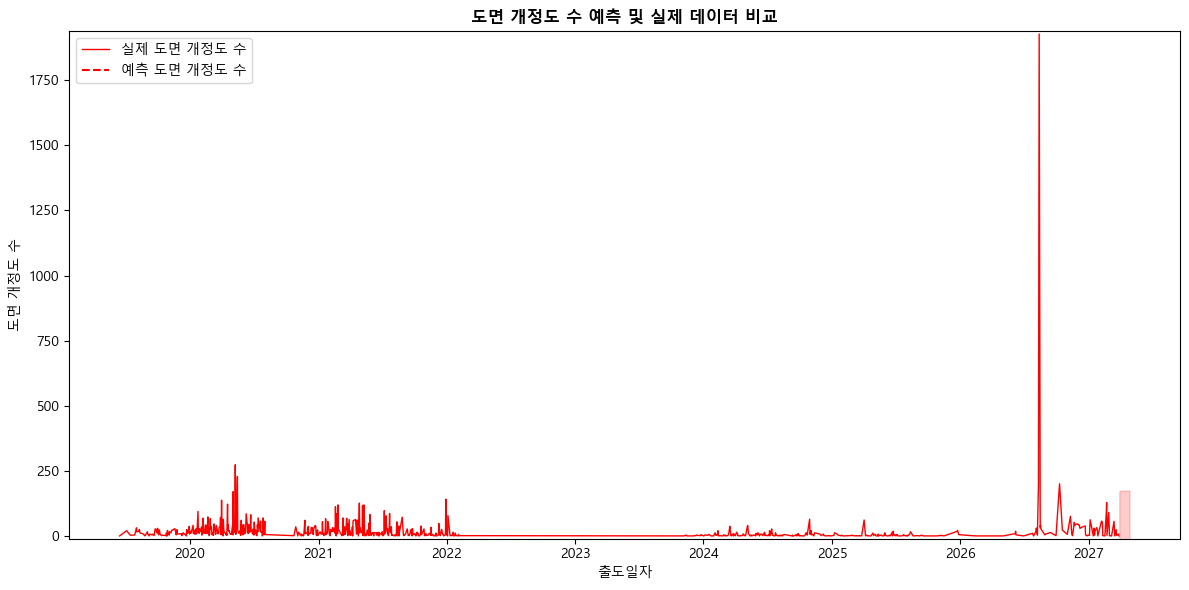

In [38]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# 일별 도면 개정도 수 집계
time_series_data = data_cleaned.groupby('출도일자').size()

# 데이터프레임으로 변환
time_series_df = time_series_data.reset_index(name='도면 개정도 수')

# 날짜를 인덱스로 설정
time_series_df.set_index('출도일자', inplace=True)

# ARIMA 모델 피팅
model = ARIMA(time_series_df, order=(1, 1, 1))
model_fit = model.fit()

# 모델 요약 출력
print(model_fit.summary())

# 예측 수행 (향후 30일 예측)
forecast_periods = 30
forecast = model_fit.get_forecast(steps=forecast_periods)

# 예측 결과 확인
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# 예측 결과를 데이터프레임으로
forecast_index = pd.date_range(start=time_series_df.index[-1] + pd.Timedelta(days=1), periods=forecast_periods, freq='D')
forecast_df = pd.DataFrame(forecast_values, index=forecast_index, columns=['예측 도면 개정도 수'])

# 예측 결과와 실제 데이터 함께 시각화
plt.figure(figsize=(12, 6))
plt.plot(time_series_df, label='실제 도면 개정도 수', color='red', linewidth=1)
plt.plot(forecast_df, label='예측 도면 개정도 수', linestyle='--', color='red')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='red', alpha=0.2)
plt.title('도면 개정도 수 예측 및 실제 데이터 비교', fontweight='bold')
plt.xlabel('출도일자')
plt.ylabel('도면 개정도 수')
plt.ylim(min(time_series_df['도면 개정도 수']) - 10, max(time_series_df['도면 개정도 수']) + 10)
plt.legend()
plt.tight_layout()
plt.show()


                               SARIMAX Results                                
Dep. Variable:               도면 개정도 수   No. Observations:                  817
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1153.036
Date:                Mon, 02 Sep 2024   AIC                           2312.071
Time:                        16:39:02   BIC                           2326.184
Sample:                             0   HQIC                          2317.488
                                - 817                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0748      0.031      2.406      0.016       0.014       0.136
ma.L1         -0.9270      0.013    -69.224      0.000      -0.953      -0.901
sigma2         0.9860      0.042     23.319      0.0

c:\Users\samsung\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\samsung\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\samsung\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


c:\Users\samsung\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\samsung\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


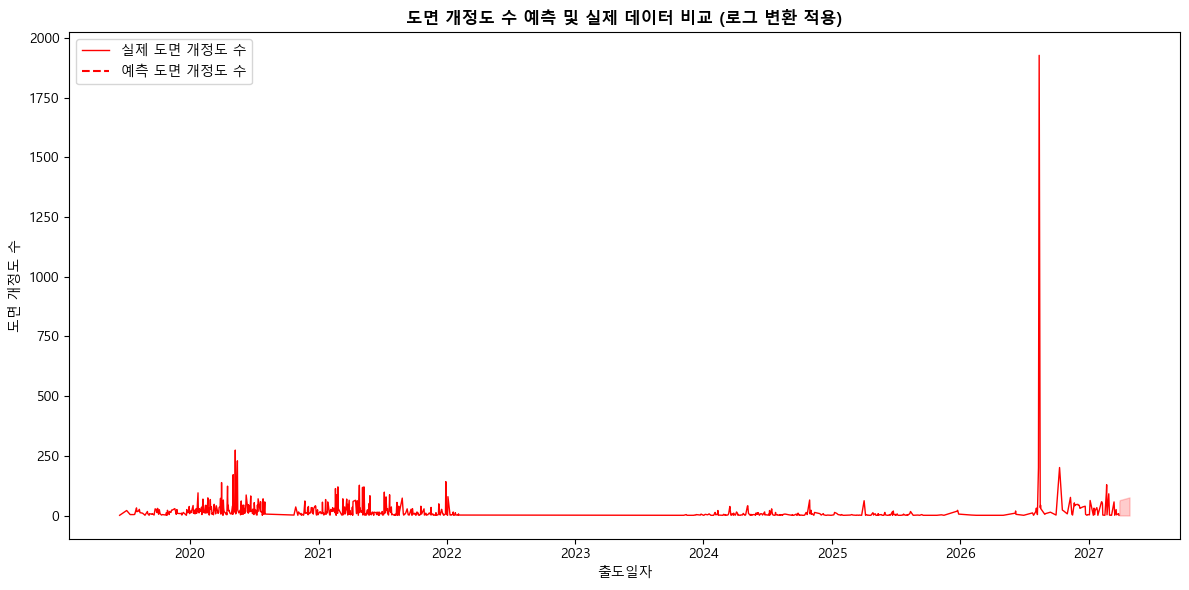

In [39]:
import numpy as np

# 로그 변환 및 이상치 처리
time_series_df['도면 개정도 수'] = np.log1p(time_series_df['도면 개정도 수'])

# ARIMA 모델 피팅
model = ARIMA(time_series_df, order=(1, 1, 1))
model_fit = model.fit()

# 모델 요약 출력
print(model_fit.summary())

# 예측 수행 (향후 30일 예측)
forecast_periods = 30
forecast = model_fit.get_forecast(steps=forecast_periods)

# 예측 결과 확인
forecast_values = forecast.predicted_mean
forecast_values = np.expm1(forecast_values)  # 로그 변환 역변환
forecast_ci = np.expm1(forecast.conf_int())

# 예측 결과를 데이터프레임으로
forecast_index = pd.date_range(start=time_series_df.index[-1] + pd.Timedelta(days=1), periods=forecast_periods, freq='D')
forecast_df = pd.DataFrame(forecast_values, index=forecast_index, columns=['예측 도면 개정도 수'])

# 예측 결과와 실제 데이터 함께 시각화
plt.figure(figsize=(12, 6))
plt.plot(np.expm1(time_series_df), label='실제 도면 개정도 수', color='red', linewidth=1)
plt.plot(forecast_df, label='예측 도면 개정도 수', linestyle='--', color='red')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='red', alpha=0.2)
plt.title('도면 개정도 수 예측 및 실제 데이터 비교 (로그 변환 적용)', fontweight='bold')
plt.xlabel('출도일자')
plt.ylabel('도면 개정도 수')
plt.legend()
plt.tight_layout()
plt.show()
